In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create the target directory if it doesn't exist
os.makedirs('/content/drive/MyDrive/Datasets/Shadow', exist_ok=True)

# Update BASE_DIR to point to the mounted location
BASE_DIR = '/content/drive/MyDrive/Datasets/Shadow'  # Path to your dataset folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
# from tqdm.notebook import tqdm
# import numpy as np
# import albumentations as A
# from albumentations.pytorch import ToTensorV2
# import cv2
# import matplotlib.pyplot as plt

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# # Configuration
# IMG_SIZE = 256
# BATCH_SIZE = 8
# EPOCHS = 10
# LEARNING_RATE = 0.001
# NUM_WORKERS = 2
# # BASE_DIR = '/content/shadow_dataset'  # Path to your dataset folder
# SAVE_DIR = './models'
# os.makedirs(SAVE_DIR, exist_ok=True)

# # Data augmentation
# train_transform = A.Compose([
#     A.Resize(IMG_SIZE, IMG_SIZE),
#     A.HorizontalFlip(p=0.5),
#     A.VerticalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
#     A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ToTensorV2()
# ])

# test_transform = A.Compose([
#     A.Resize(IMG_SIZE, IMG_SIZE),
#     A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ToTensorV2()
# ])

# # Custom dataset
# # Custom dataset
# class ShadowDataset(Dataset):
#     def __init__(self, image_dir, mask_dir, transform=None):
#         self.image_dir = image_dir
#         self.mask_dir = mask_dir
#         self.transform = transform
#         self.image_list = os.listdir(image_dir)

#     def __len__(self):
#         return len(self.image_list)

#     def __getitem__(self, idx):
#       img_path = os.path.join(self.image_dir, self.image_list[idx])
#       mask_path = os.path.join(self.mask_dir, self.image_list[idx])

#       image = cv2.imread(img_path)
#       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#       mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
#       mask = np.expand_dims(mask, axis=-1)  # Ensure the mask has the shape (height, width, 1)

#       if self.transform:
#           augmented = self.transform(image=image, mask=mask)
#           image, mask = augmented["image"], augmented["mask"]

#       mask = mask.float() / 255.0  # Normalize mask to [0,1]

#       # Reshape the mask to (channels, height, width)
#       mask = mask.permute(2, 0, 1)  # Change order of dimensions

#       return image, mask


# # Load dataset
# train_dataset = ShadowDataset(os.path.join(BASE_DIR, 'shadow'), os.path.join(BASE_DIR, 'shadowmask'), transform=train_transform)
# val_dataset = ShadowDataset(os.path.join(BASE_DIR, 'shadow'), os.path.join(BASE_DIR, 'shadowmask'), transform=test_transform)

# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

# # Model: U-Net
# # Model: U-Net
# class UNet(nn.Module):
#     def __init__(self, in_channels=3, out_channels=1):
#         super(UNet, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         self.decoder = nn.Sequential(
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             # Upsample to match the target mask size
#             nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2), # Add an upsampling layer
#             nn.ReLU(),
#             nn.Conv2d(64, out_channels, kernel_size=1)
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return torch.sigmoid(x)

# model = UNet().to(device)

# # Loss function & Optimizer
# def dice_loss(pred, target, smooth=1e-6):
#     intersection = (pred * target).sum()
#     return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

# class CombinedLoss(nn.Module):
#     def __init__(self):
#         super(CombinedLoss, self).__init__()
#         self.bce = nn.BCEWithLogitsLoss()

#     def forward(self, pred, target):
#         return self.bce(pred, target) + dice_loss(pred, target)

# criterion = CombinedLoss()
# optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)



Using device: cuda


In [40]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm.notebook import tqdm
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Configuration
IMG_SIZE = 256
BATCH_SIZE = 8
EPOCHS = 10
LEARNING_RATE = 0.001
NUM_WORKERS = 2
BASE_DIR = '/content/drive/MyDrive/Datasets/Shadow'  # Path to your dataset folder
SAVE_DIR = './models'
os.makedirs(SAVE_DIR, exist_ok=True)

# Data augmentation
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.GaussianBlur(p=0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

test_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# Custom dataset
class ShadowDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_list = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.image_list[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.expand_dims(mask, axis=-1)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image, mask = augmented["image"], augmented["mask"]

        mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
        return image, mask

# Load dataset
train_dataset = ShadowDataset(os.path.join(BASE_DIR, 'shadow'), os.path.join(BASE_DIR, 'shadowmask'), transform=train_transform)
val_dataset = ShadowDataset(os.path.join(BASE_DIR, 'shadow'), os.path.join(BASE_DIR, 'shadowmask'), transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

# Model: Improved U-Net
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(),
                nn.Conv2d(out_c, out_c, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU()
            )

        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = conv_block(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = conv_block(1024, 512)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))
        enc4 = self.encoder4(self.pool(enc3))

        bottleneck = self.bottleneck(self.pool(enc4))

        dec4 = self.decoder4(torch.cat((self.upconv4(bottleneck), enc4), dim=1))
        dec3 = self.decoder3(torch.cat((self.upconv3(dec4), enc3), dim=1))
        dec2 = self.decoder2(torch.cat((self.upconv2(dec3), enc2), dim=1))
        dec1 = self.decoder1(torch.cat((self.upconv1(dec2), enc1), dim=1))

        return torch.sigmoid(self.final_conv(dec1))

model = UNet().to(device)

# Loss function & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)


Using device: cuda


In [41]:
# Training loop
best_val_loss = float('inf')
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}')

    for images, masks in pbar:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        pbar.set_postfix({'loss': f'{running_loss / len(train_loader):.3f}'})

    model.eval()
    val_loss = sum(criterion(model(images.to(device)), masks.to(device)).item() for images, masks in val_loader) / len(val_loader)
    print(f'Validation Loss: {val_loss:.4f}')
    scheduler.step(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), os.path.join(SAVE_DIR, 'Last_model.pth'))


Epoch 1/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.7239


Epoch 2/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6972


Epoch 3/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6949


Epoch 4/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6941


Epoch 5/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6938


Epoch 6/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6936


Epoch 7/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6935


Epoch 8/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6934


Epoch 9/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6933


Epoch 10/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Validation Loss: 0.6933


In [42]:
import torch

def accuracy(pred, target):
    pred = pred > 0.5  # Convert probabilities to binary predictions
    correct = (pred == target).sum().item()
    total = target.numel()  # total pixels in the mask
    return correct / total

def iou(pred, target):
    pred = pred > 0.5  # Convert probabilities to binary predictions
    target = target > 0.5  # Convert ground truth to binary as well

    intersection = (pred & target).sum().item()
    union = (pred | target).sum().item()

    return intersection / (union + 1e-6)  # Avoid division by zero

def dice_score(pred, target):
    pred = pred > 0.5  # Convert probabilities to binary predictions
    target = target > 0.5  # Convert ground truth to binary

    intersection = (pred & target).sum().item()
    return 2 * intersection / (pred.sum().item() + target.sum().item() + 1e-6)  # Avoid division by zero


In [43]:
def evaluate_model(model, dataset, batch_size=8):
    model.eval()  # Set the model to evaluation mode
    all_accuracy = []
    all_iou = []
    all_dice = []

    with torch.no_grad():
        for i in range(0, len(dataset), batch_size):
            batch_images, batch_masks = [], []
            for j in range(i, min(i + batch_size, len(dataset))):
                image, mask = dataset[j]
                batch_images.append(image.unsqueeze(0))
                batch_masks.append(mask.unsqueeze(0))

            batch_images = torch.cat(batch_images).to(device)
            batch_masks = torch.cat(batch_masks).to(device)

            # Forward pass
            pred_masks = model(batch_images)

            # Calculate metrics for each sample in the batch
            for pred, target in zip(pred_masks, batch_masks):
                pred = pred.cpu().squeeze()
                target = target.cpu().squeeze()

                # Compute accuracy, IoU, and Dice score
                all_accuracy.append(accuracy(pred, target))
                all_iou.append(iou(pred, target))
                all_dice.append(dice_score(pred, target))

    # Calculate the average of the metrics
    avg_accuracy = np.mean(all_accuracy)
    avg_iou = np.mean(all_iou)
    avg_dice = np.mean(all_dice)

    return avg_accuracy, avg_iou, avg_dice

# Run evaluation on the validation dataset
val_accuracy, val_iou, val_dice = evaluate_model(model, val_dataset)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation IoU: {val_iou:.4f}")
print(f"Validation Dice Score: {val_dice:.4f}")


<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]


Validation Accuracy: 0.9453
Validation IoU: 0.0000
Validation Dice Score: 0.0000


<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]


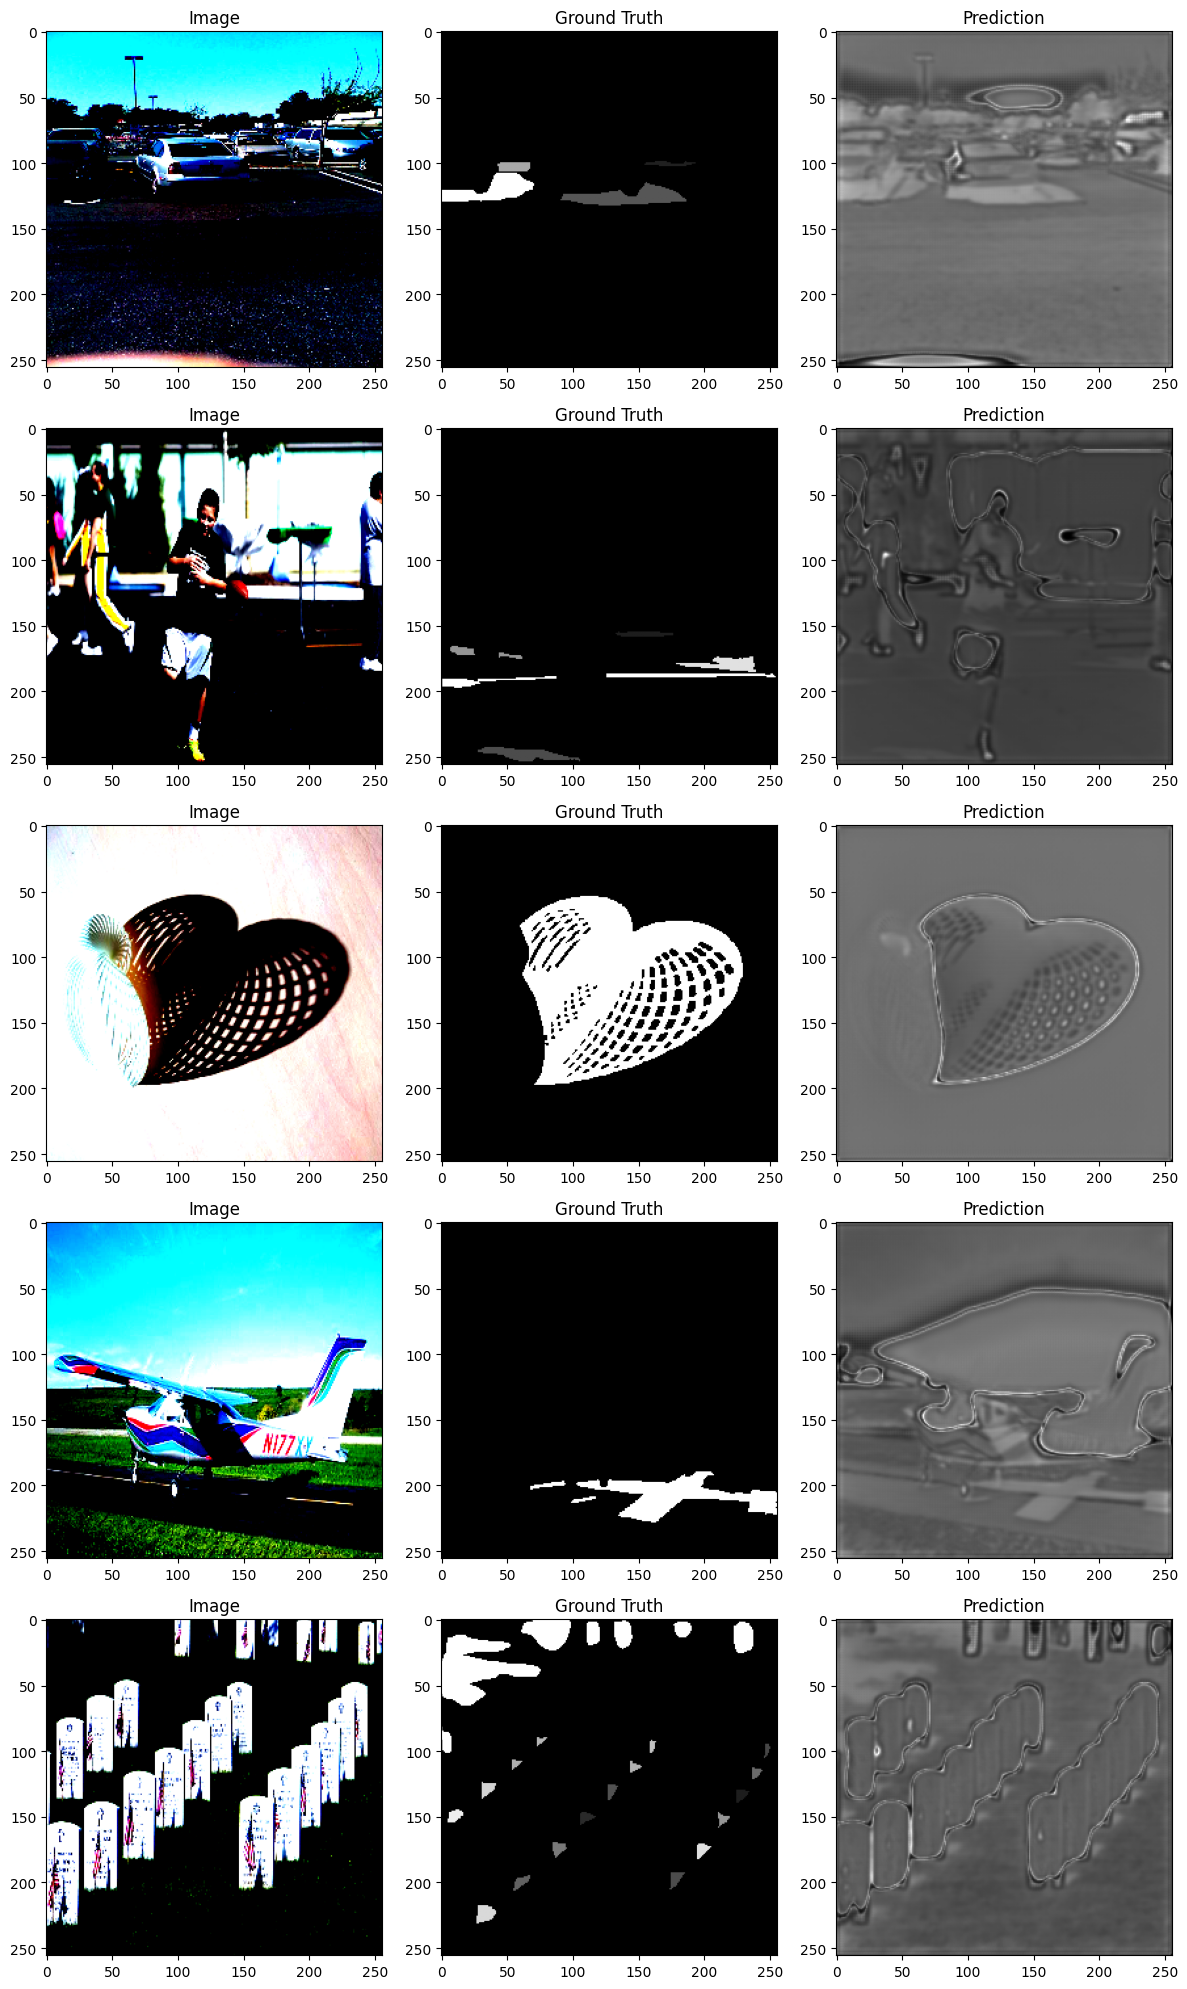

In [44]:
def visualize_predictions(model, dataset, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))

    for i in range(num_samples):
        idx = np.random.randint(0, len(dataset))
        image, mask = dataset[idx]
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            pred_mask = model(image).cpu().squeeze().numpy()

        axes[i, 0].imshow(image.cpu().squeeze().permute(1, 2, 0))
        axes[i, 0].set_title("Image")
        axes[i, 1].imshow(mask.cpu().squeeze(), cmap='gray')
        axes[i, 1].set_title("Ground Truth")
        axes[i, 2].imshow(pred_mask, cmap='gray')
        axes[i, 2].set_title("Prediction")

    plt.tight_layout()
    plt.show()

# Visualize some predictions
visualize_predictions(model, val_dataset)


Epoch 1/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 2/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 3/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 4/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 5/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 6/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 7/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 8/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 9/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

Epoch 10/10:   0%|          | 0/127 [00:00<?, ?it/s]

<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<ipython-input-40-2741a306917e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize mask to [0,1]
<

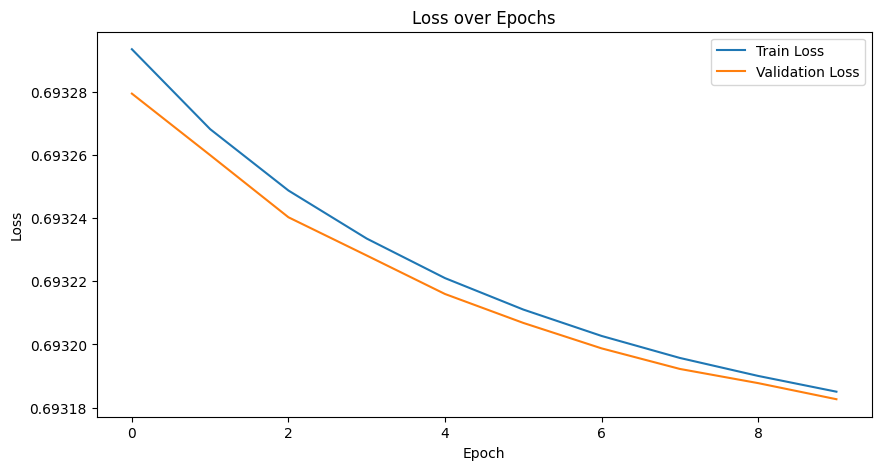

In [45]:
# During training loop, store loss values:
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS}"):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), train_losses, label='Train Loss')
plt.plot(range(EPOCHS), val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
